In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import opendatasets as od

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dense, MaxPooling2D,Flatten,Dropout,Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras import regularizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import datetime
from tensorflow.keras.utils import plot_model

In [3]:
od.download("https://www.kaggle.com/datasets/sumansid/facemask-dataset",data_dir="dataset1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 114M/114M [00:00<00:00, 151MB/s]


In [4]:
od.download("https://www.kaggle.com/datasets/ahemateja19bec1025/facemask-dataset",data_dir="dataset2")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 50.4M/50.4M [00:00<00:00, 122MB/s]


In [5]:
od.download("https://www.kaggle.com/datasets/vinaykudari/facemask",data_dir="dataset3")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 137M/137M [00:01<00:00, 119MB/s]


In [6]:
od.download("https://www.kaggle.com/datasets/pranavsingaraju/facemask-detection-dataset-20000-images",data_dir="dataset4")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 604M/604M [00:03<00:00, 206MB/s]


In [7]:
od.download("https://www.kaggle.com/datasets/ashiqurrahmantanzil/facemask-dataset",data_dir="dataset5")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 1.26G/1.26G [00:10<00:00, 132MB/s]


In [9]:
od.download("https://www.kaggle.com/datasets/shiekhburhan/face-mask-dataset",data_dir="dataset6")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 2.33G/2.33G [00:18<00:00, 135MB/s]


In [10]:
od.download("https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset", data_dir = "dataset7")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 330M/330M [00:01<00:00, 194MB/s]


In [11]:
od.download("https://www.kaggle.com/datasets/spandanpatnaik09/face-mask-detectormask-not-mask-incorrect-mask",data_dir = "dataset8")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: islamfares26
Your Kaggle Key: ··········


100%|██████████| 190M/190M [00:01<00:00, 151MB/s]


In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [13]:
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)

In [14]:
train_dataset1  = train_datagen.flow_from_directory(directory = '/content/dataset1/facemask-dataset',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'Mask': 0,'No Mask': 1})
valid_dataset1 = valid_datagen.flow_from_directory(directory = '/content/dataset1/facemask-dataset',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'Mask': 0,'No Mask': 1})

Found 270 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset2  = train_datagen.flow_from_directory(directory = '/content/dataset2/facemask-dataset/dataset/dataset',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'1': 0,'0': 1})
valid_dataset2 = valid_datagen.flow_from_directory(directory = '/content/dataset2/facemask-dataset/dataset/dataset',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'1': 0,'0': 1})

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [16]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset3  = train_datagen.flow_from_directory(directory = '/content/dataset3/facemask/train',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
valid_dataset3 = valid_datagen.flow_from_directory(directory = '/content/dataset3/facemask/train',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 435 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [17]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset4  = train_datagen.flow_from_directory(directory = '/content/dataset4/facemask-detection-dataset-20000-images',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'new_with_mask': 0,'new_without_mask': 1})
valid_dataset4 = valid_datagen.flow_from_directory(directory = '/content/dataset4/facemask-detection-dataset-20000-images',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                  classes={'new_with_mask': 0,'new_without_mask': 1})

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [18]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset5  = train_datagen.flow_from_directory(directory = '/content/dataset5/facemask-dataset/dataset_final',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
test_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset5/facemask-dataset/dataset_final',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                 shuffle = False,
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 11869 images belonging to 2 classes.
Found 2966 images belonging to 2 classes.


In [19]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset5  = train_datagen.flow_from_directory(directory = '/content/dataset5/facemask-dataset/dataset_final',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
test_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset5/facemask-dataset/dataset_final',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                 shuffle = False,
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 11869 images belonging to 2 classes.
Found 2966 images belonging to 2 classes.


In [20]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset5  = train_datagen.flow_from_directory(directory = '/content/dataset6/face-mask-dataset/FMD_DATASET',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
test_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset6/face-mask-dataset/FMD_DATASET',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                 shuffle = False,
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 7630 images belonging to 2 classes.
Found 1906 images belonging to 2 classes.


In [21]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset5  = train_datagen.flow_from_directory(directory = '/content/dataset7/face-mask-12k-images-dataset/Face Mask Dataset/Train',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'WithMask': 0,'WithoutMask': 1})
test_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset7/face-mask-12k-images-dataset/Face Mask Dataset/Train',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                 shuffle = False,
                                                  classes={'WithMask': 0,'WithoutMask': 1})

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [22]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   validation_split = 0.2, rotation_range=2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,validation_split=0.2)
train_dataset5  = train_datagen.flow_from_directory(directory = '/content/dataset8/face-mask-detectormask-not-mask-incorrect-mask/dataset',
                                                   class_mode = 'binary',
                                                   color_mode="rgb",
                                                    subset="training",
                                                     target_size = (128,128),
                                                   classes={'with_mask': 0,'without_mask': 1})
test_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset8/face-mask-detectormask-not-mask-incorrect-mask/dataset',
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  color_mode="rgb",
                                                    target_size = (128,128),
                                                 shuffle = False,
                                                  classes={'with_mask': 0,'without_mask': 1})

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [23]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [24]:
training_set = combine_gen(train_dataset1,train_dataset2,train_dataset3,train_dataset4,train_dataset5)
valid_set =  combine_gen(valid_dataset1,valid_dataset2,valid_dataset3,valid_dataset4)
test_set = test_dataset

In [25]:
import numpy as np 
import pandas as pd


import seaborn as sn
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def train_model(model, epochs, learning_rate):
   checkpoint_filepath = '/tmp/checkpointNew'
   earlyStopping = tf.keras.callbacks.EarlyStopping(
        patience=5,
        monitor="val_accuracy",
        verbose=1,)
   model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
       filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_freq="epoch")
   lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-10)
   adam = keras.optimizers.Adam(learning_rate=learning_rate)
   METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]
   model.compile(optimizer=adam, loss='binary_crossentropy', metrics=METRICS)
   history = model.fit(training_set, validation_data = valid_set,validation_steps = 100, batch_size = 512, steps_per_epoch= 200,  epochs = epochs,
                        callbacks=[model_checkpoint_callback,earlyStopping,lrd])
   return history
def plot_metrics(model, history, test):
    print("Accuracy of model on testing data : " , model.evaluate(test_set)[1]*100 , "%")
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" Metrics evaluation of the model ")

    ax1.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
    ax1.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
    ax2.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(history.history['auc']) + 1), history.history['auc'])
    ax3.plot(range(1, len(history.history['val_auc']) + 1), history.history['val_auc'])
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(history.history['precision']) + 1), history.history['precision'])
    ax4.plot(range(1, len(history.history['val_precision']) + 1), history.history['val_precision'])
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(history.history['recall']) + 1), history.history['recall'])
    ax5.plot(range(1, len(history.history['val_recall']) + 1), history.history['val_recall'])
    ax5.set_title('History of Recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])
    plt.show()
def test_model(model, test_set):
    y_pred = model.predict(test_set)
    y_result = []
    for p in y_pred:
        y_result.append(int(p >= 0.5))
    
    y_actual = []
    for i in range(len(test_set)):
        for p in test_set[i][1]:
            y_actual.append(int(p >= 0.5))
    
    print(classification_report(y_actual, y_result))
    
    cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

    plt.figure(figsize = (10, 8))
    sn.heatmap(cm, annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
def CNN( dense_nodes, drop, activation, epochs, lr):
    # define model
    model = Sequential()
    model.add(Conv2D(dense_nodes, (3, 3), activation='relu', input_shape= (128, 128, 3)))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(dense_nodes/2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(dense_nodes/4, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(dense_nodes/8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dropout(drop))
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation=activation) )
 
    opt = SGD(lr=lr, momentum=0.9)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    history = train_model(model, epochs, lr)
    plot_metrics(model, history, test_set)
    test_model(model, test_set)

    return model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/9
 10/200 [>.............................] - ETA: 58s - loss: 3.2381 - accuracy: 0.5531 - precision: 0.5789 - recall: 0.5824 - auc: 0.5637 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


200/200 [==============================] - 100s 442ms/step - loss: 0.8190 - accuracy: 0.6448 - precision: 0.6390 - recall: 0.5949 - auc: 0.6952 - val_loss: 0.4694 - val_accuracy: 0.7218 - val_precision: 0.7187 - val_recall: 0.6704 - val_auc: 0.8473 - lr: 1.0000e-04
Epoch 2/9
200/200 [==============================] - 85s 425ms/step - loss: 0.4856 - accuracy: 0.7610 - precision: 0.7472 - recall: 0.7547 - auc: 0.8476 - val_loss: 0.4242 - val_accuracy: 0.7996 - val_precision: 0.8437 - val_recall: 0.7103 - val_auc: 0.9063 - lr: 1.0000e-04
Epoch 3/9
200/200 [==============================] - 83s 419ms/step - loss: 0.3886 - accuracy: 0.8348 - precision: 0.8171 - recall: 0.8382 - auc: 0.9089 - val_loss: 0.2581 - val_accuracy: 0.8925 - val_precision: 0.8951 - val_recall: 0.8763 - val_auc: 0.9598 - lr: 1.0000e-04
Epoch 4/9
200/200 [==============================] - 88s 444ms/step - loss: 0.3258 - accuracy: 0.8709 - precision: 0.8587 - recall: 0.8717 - auc: 0.9372 - val_loss: 0.1914 - val_accura

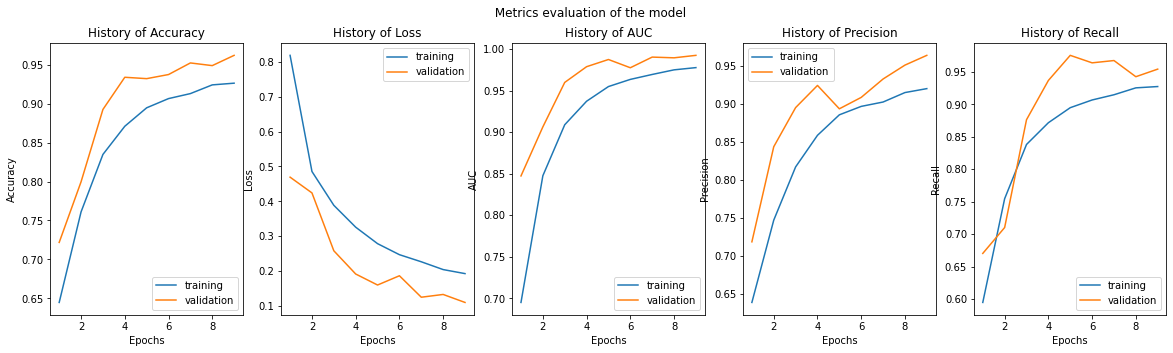

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       138
           1       1.00      0.92      0.96       137

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



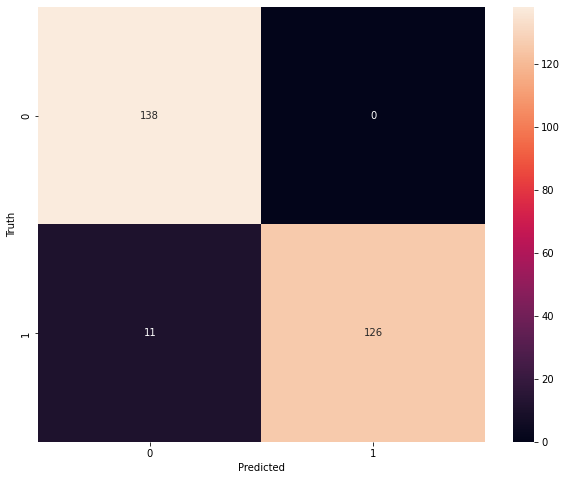

In [26]:
nodes = 256
drop_rate = 0.4
activation = 'sigmoid'
epochs = 9
lr = 0.0001

model = CNN( nodes, drop_rate, activation, epochs, lr)


In [27]:
from keras.models import load_model

model.save('model_weights.h5')

In [28]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write("model_json")